In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
irisDataset = pd.read_csv("E:\Data_Scientist\Skill_Share(DataScienceCourse)\Datasets\Iris_dataset_28.csv")
irisDataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
irisDataset.shape

(150, 6)

In [4]:
irisDataset1 = irisDataset.drop(columns = ['Id'],axis= 1)

In [5]:
#since its K-means i.e unsupervised learning wee remove species column
irisDataset1= irisDataset1.drop(columns = ['Species'],axis= 1)

In [6]:
irisDataset1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
#now choose features to use sepel width and sepel width 
X = irisDataset1.iloc[:,[1,3]].values
print(X)

[[3.5 0.2]
 [3.  0.2]
 [3.2 0.2]
 [3.1 0.2]
 [3.6 0.2]
 [3.9 0.4]
 [3.4 0.3]
 [3.4 0.2]
 [2.9 0.2]
 [3.1 0.1]
 [3.7 0.2]
 [3.4 0.2]
 [3.  0.1]
 [3.  0.1]
 [4.  0.2]
 [4.4 0.4]
 [3.9 0.4]
 [3.5 0.3]
 [3.8 0.3]
 [3.8 0.3]
 [3.4 0.2]
 [3.7 0.4]
 [3.6 0.2]
 [3.3 0.5]
 [3.4 0.2]
 [3.  0.2]
 [3.4 0.4]
 [3.5 0.2]
 [3.4 0.2]
 [3.2 0.2]
 [3.1 0.2]
 [3.4 0.4]
 [4.1 0.1]
 [4.2 0.2]
 [3.1 0.1]
 [3.2 0.2]
 [3.5 0.2]
 [3.1 0.1]
 [3.  0.2]
 [3.4 0.2]
 [3.5 0.3]
 [2.3 0.3]
 [3.2 0.2]
 [3.5 0.6]
 [3.8 0.4]
 [3.  0.3]
 [3.8 0.2]
 [3.2 0.2]
 [3.7 0.2]
 [3.3 0.2]
 [3.2 1.4]
 [3.2 1.5]
 [3.1 1.5]
 [2.3 1.3]
 [2.8 1.5]
 [2.8 1.3]
 [3.3 1.6]
 [2.4 1. ]
 [2.9 1.3]
 [2.7 1.4]
 [2.  1. ]
 [3.  1.5]
 [2.2 1. ]
 [2.9 1.4]
 [2.9 1.3]
 [3.1 1.4]
 [3.  1.5]
 [2.7 1. ]
 [2.2 1.5]
 [2.5 1.1]
 [3.2 1.8]
 [2.8 1.3]
 [2.5 1.5]
 [2.8 1.2]
 [2.9 1.3]
 [3.  1.4]
 [2.8 1.4]
 [3.  1.7]
 [2.9 1.5]
 [2.6 1. ]
 [2.4 1.1]
 [2.4 1. ]
 [2.7 1.2]
 [2.7 1.6]
 [3.  1.5]
 [3.4 1.6]
 [3.1 1.5]
 [2.3 1.3]
 [3.  1.3]
 [2.5 1.3]
 [2.6 1.2]

In [13]:
##using elbow method to determine WCSS of each cluster

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    #using k means techniquee to initiate
    kmeans = KMeans(n_clusters = i, init= 'k-means++', random_state =42)
    #fitting lenghts in the function
    kmeans.fit(X)
    #than saves these value in empty list
    wcss.append(kmeans.inertia_)

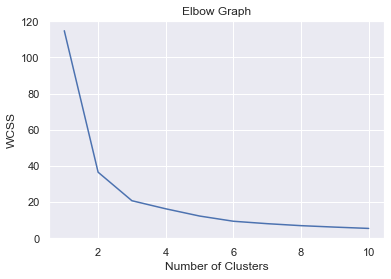

In [14]:
# now plot the elbow graph 
import seaborn as sns
sns.set() # for better visualization

plt.plot(range(1,11),wcss)
plt.title("Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [18]:
   
#using k means again since now we know there are 3 clusters
kmeans = KMeans(n_clusters = 3, init= 'k-means++', random_state =0)
#fitting lenghts in the function also labeling each clusters
y = kmeans.fit_predict(X)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 2 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


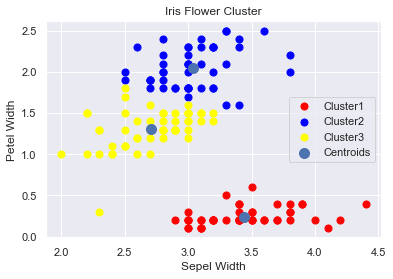

In [24]:
# finally Visulaizing clusters
#for cluster 0
plt.scatter(X[y==0,0],X[y==0,1],s =50, c ='red', label = 'Cluster1')
#for cluster 1
plt.scatter(X[y==1,0],X[y==1,1],s =50, c ='blue', label = 'Cluster2') # all the vlaue of for whic y value is 1
#for cluster 2
plt.scatter(X[y==2,0],X[y==2,1],s =50, c ='yellow', label = 'Cluster3')

#now to plot centroid which kmeans predict
plt.scatter (kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s= 100, label = 'Centroids')

plt.title("Iris Flower Cluster")
plt.xlabel('Sepel Width')
plt.ylabel('Petel Width')
plt.legend()# put labels in graph 
plt.show()